In [50]:
#import libraries
import pandas as pd
from pandas import DataFrame 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import itertools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from pylab import rcParams

from numpy import log


params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (18, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [2]:
#retrieve data
def GetData(fileName):
    return pd.read_csv(fileName, header=0,usecols=['Date','Adj Close'], parse_dates=True, index_col='Date')

In [3]:
data_ivv = GetData('Asset_Dataset/IVV.csv')
data_ivv = data_ivv.dropna()
data_ivv.head()


,Adj Close
Date,
2014-06-02,176.640778
2014-06-09,175.508820
2014-06-16,177.934479
2014-06-23,177.215759
2014-06-30,180.068802


In [4]:
data_ivv.columns = ['IVV adjusted close']

In [5]:
data_ivv.head()

,IVV adjusted close
Date,
2014-06-02,176.640778
2014-06-09,175.508820
2014-06-16,177.934479
2014-06-23,177.215759
2014-06-30,180.068802


In [6]:
#Statistical info on IVV
data_ivv.describe()

,IVV adjusted close
count,261.000000
mean,223.273405
std,36.881681
min,172.080475
25%,191.549255
50%,210.913879
75%,260.477875
max,294.202942


In [7]:
#scale IVV data

scaler = MinMaxScaler()
scaled_ivv = scaler.fit_transform(data_ivv)
print(scaled_ivv)
%store scaled_ivv

[[0.03734205]
 [0.02807301]
 [0.04793552]
 [0.04205028]
 [0.06541243]
 [0.05351401]
 [0.0612001 ]
 [0.06171725]
 [0.02276902]
 [0.02816447]
 [0.04701016]
 [0.07243355]
 [0.08351969]
 [0.08699308]
 [0.07258162]
 [0.09024482]
 [0.06378675]
 [0.05977271]
 [0.01507256]
 [0.        ]
 [0.0587329 ]
 [0.09816093]
 [0.11130382]
 [0.11739222]
 [0.13565817]
 [0.13966795]
 [0.14605347]
 [0.09266616]
 [0.14286046]
 [0.1490978 ]
 [0.13402361]
 [0.12596243]
 [0.10618176]
 [0.13148595]
 [0.0902828 ]
 [0.13566566]
 [0.1679866 ]
 [0.17888445]
 [0.17492839]
 [0.15081856]
 [0.13805452]
 [0.17970584]
 [0.13678556]
 [0.14910555]
 [0.17663041]
 [0.16110554]
 [0.18900549]
 [0.18180533]
 [0.18863028]
 [0.19523021]
 [0.19935558]
 [0.18525535]
 [0.1748303 ]
 [0.1764806 ]
 [0.18728061]
 [0.17468036]
 [0.16399294]
 [0.16550116]
 [0.20313309]
 [0.16897006]
 [0.18789947]
 [0.16844228]
 [0.17937749]
 [0.09023707]
 [0.10283156]
 [0.05139879]
 [0.08352556]
 [0.08073501]
 [0.05283143]
 [0.07782163]
 [0.12658379]
 [0.14

In [15]:
#Change datasets to DataFrame
data_ivv_df = pd.DataFrame(data_ivv)
scaled_ivv_df = pd.DataFrame(scaled_ivv)

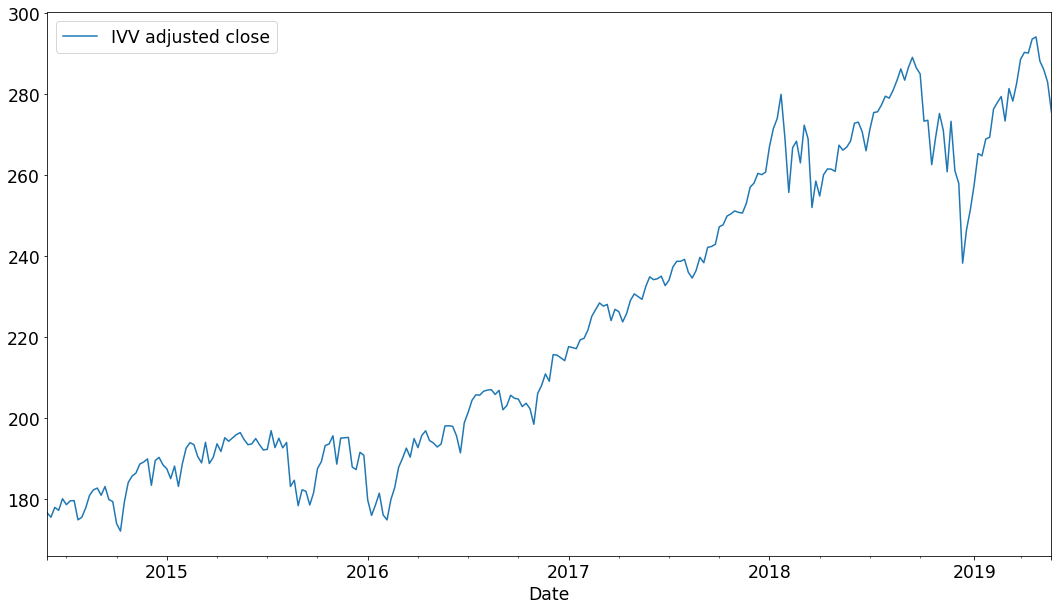

In [16]:
#Plot
data_ivv.plot()

In [39]:
scaled_ivv_df.head()

,0
0,0.037342
1,0.028073
2,0.047936
3,0.042050
4,0.065412


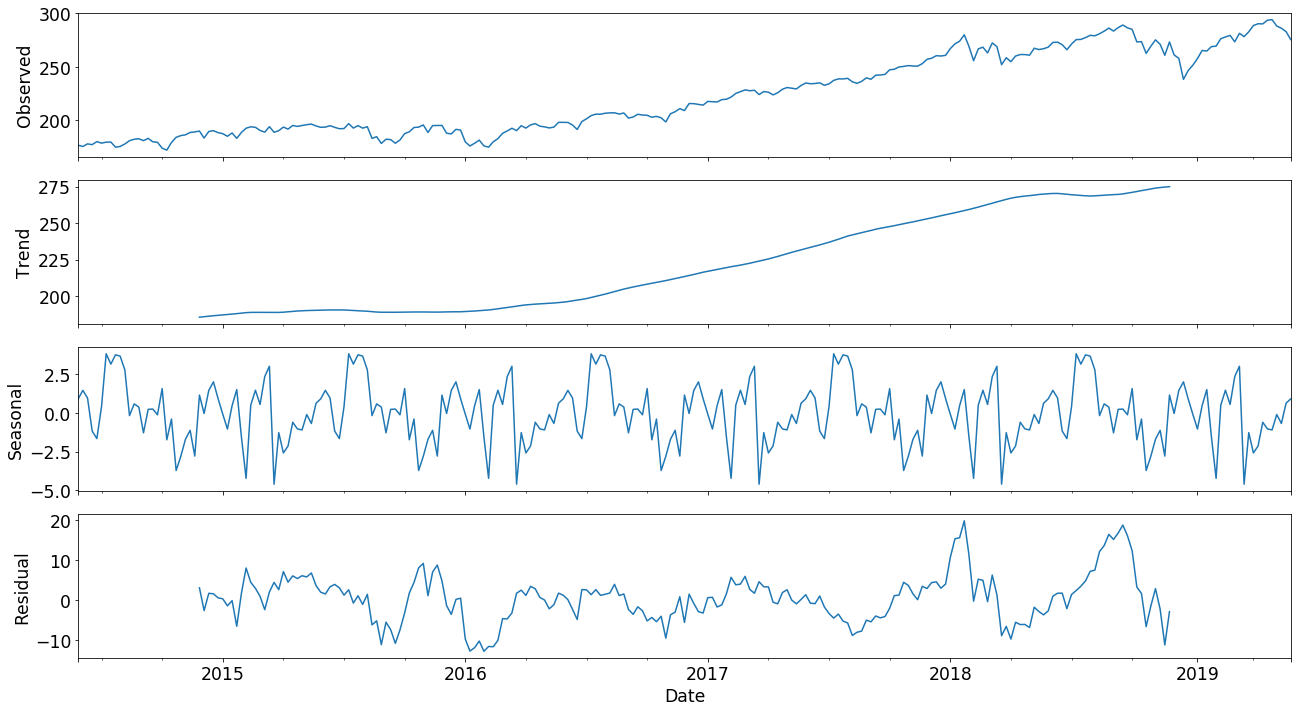

<Figure size 1440x720 with 0 Axes>

In [17]:
#Seaconality & decompo

data_ivv = data_ivv.dropna()
decomposition = sm.tsa.seasonal_decompose(data_ivv)
fig = decomposition.plot()
plt.figure(figsize=(20, 10))
plt.show()

In [11]:
#data_ivv_df=sm.add_constant(data_ivv_df)
#data_ivv_df.head()

In [12]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=52)
    rolmean = timeseries.rolling(52).mean()
    #rolstd = pd.rolling_std(timeseries, window=52)
    rolstd = timeseries.rolling(52).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

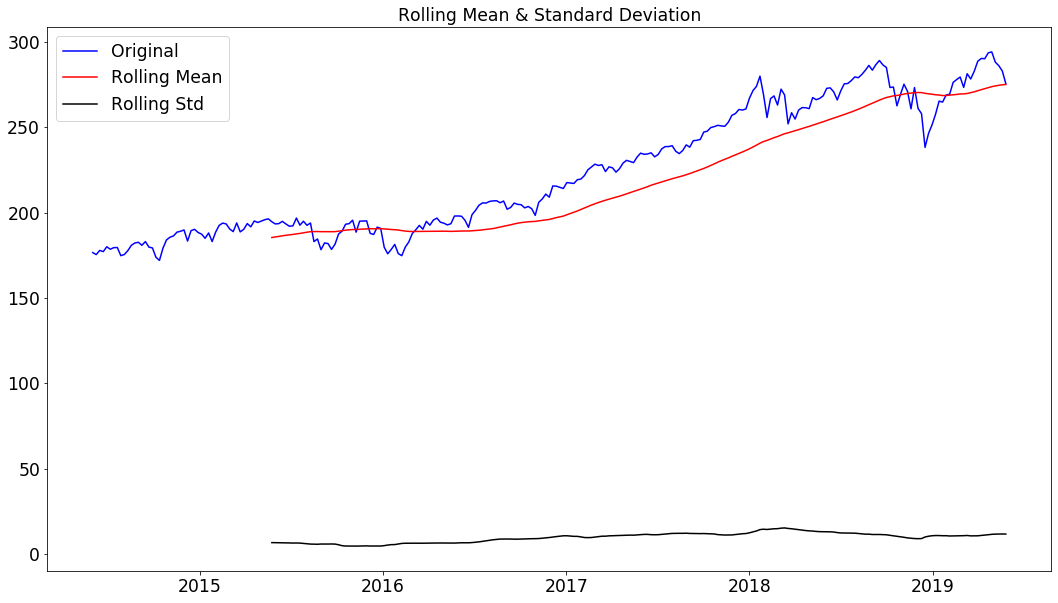

Results of Dickey-Fuller Test:
Test Statistic                  -0.693766
p-value                          0.848358
#Lags Used                       1.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64


In [18]:
test_stationarity(data_ivv_df['IVV adjusted close'])

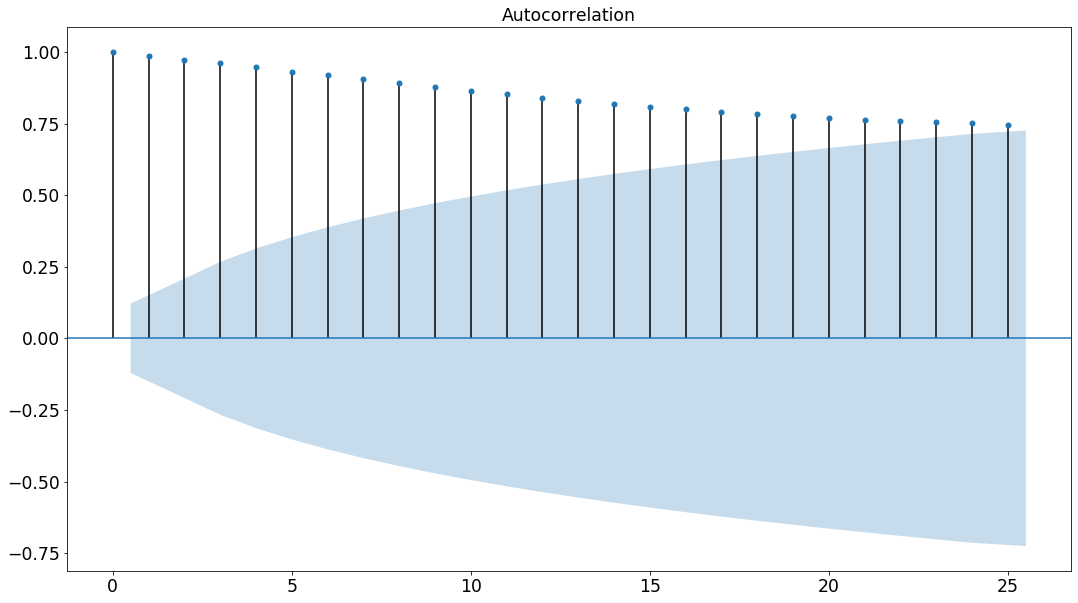

In [25]:
plot_acf(data_ivv_df['IVV adjusted close'])
plt.show()

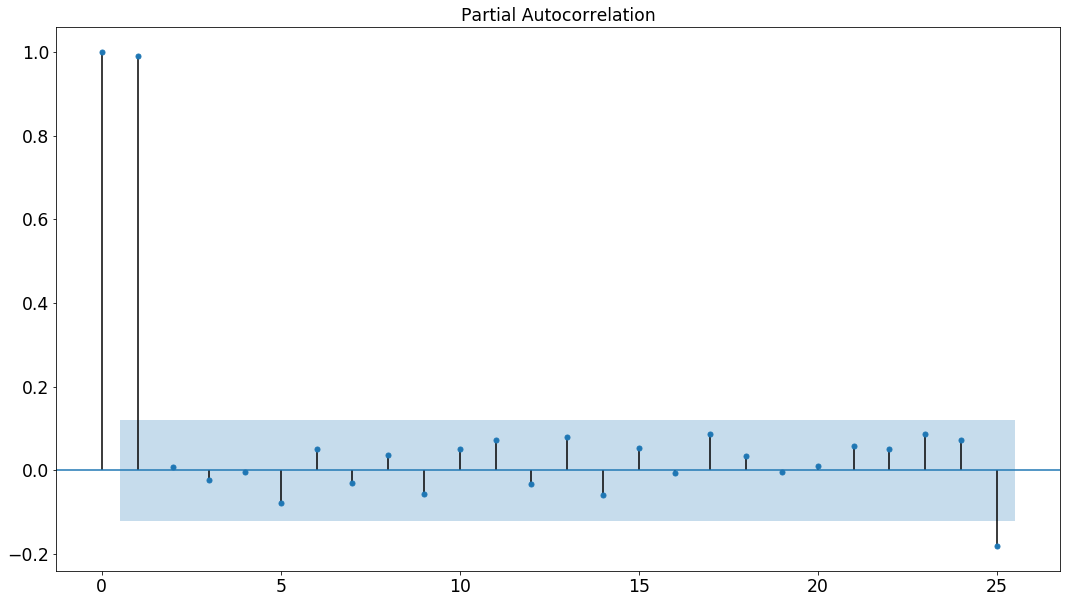

In [28]:
plot_pacf(data_ivv_df['IVV adjusted close'])
plt.show()

In [42]:
model = ARIMA(data_ivv_df, order=(5,2,0))  
ARIMA_results = model.fit(disp=-1)

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


In [48]:
ARIMA_prediction = ARIMA_results.predict(data_ivv_df.index[260])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  after removing the cwd from sys.path.


TypeError: unsupported operand type(s) for +: 'Timestamp' and 'str'

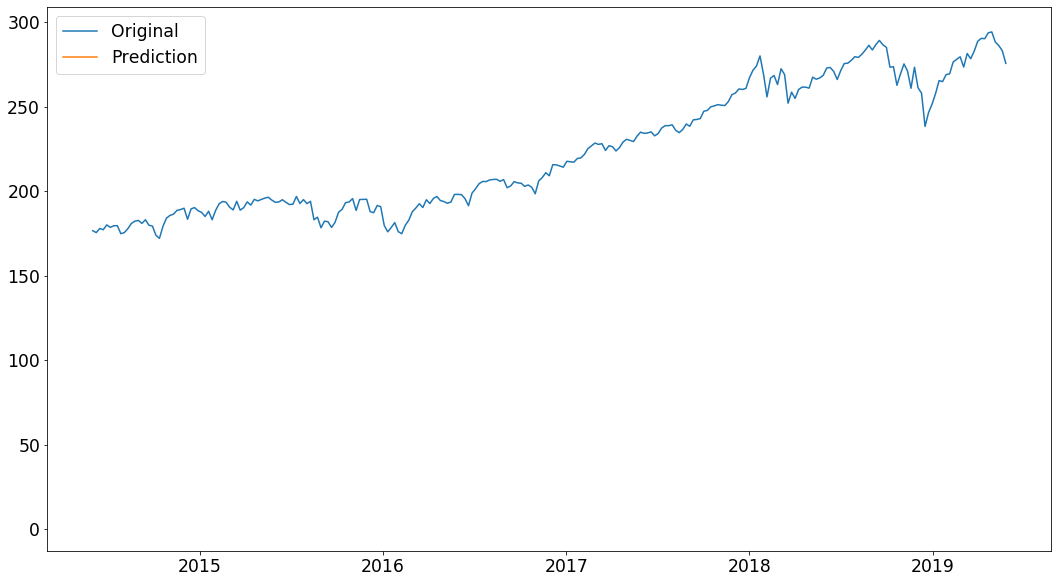

In [52]:
plt.plot(data_ivv_df, label='Original')
plt.plot(ARIMA_prediction, label='Prediction')
plt.legend(loc=2)
plt.title('RMSE: %.4f'% np.sqrt(sum((ARIMA_prediction-data_ivv_df[260:])**2)/len(data_ivv_df[260:])))